In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest
from sklearn.feature_selection import SequentialFeatureSelector, RFE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [76]:
df = pd.read_csv("sonar.all-data.csv")

df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [77]:
df.shape

(207, 61)

In [78]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [80]:
X = df.drop(columns=["R"], axis=1)
Y = df["R"]

In [81]:
def plotHist():
    plt.figure(figsize=(15,10))

    ind = 1

    for col in X.columns:
        plt.subplot(10,10,ind)
        sns.histplot(X[col], kde=True)
        ind+=1
    
    plt.show()

In [ ]:
plotHist()

In [ ]:
for col in X.columns:
    X[col], _ = boxcox(X[col]+1)

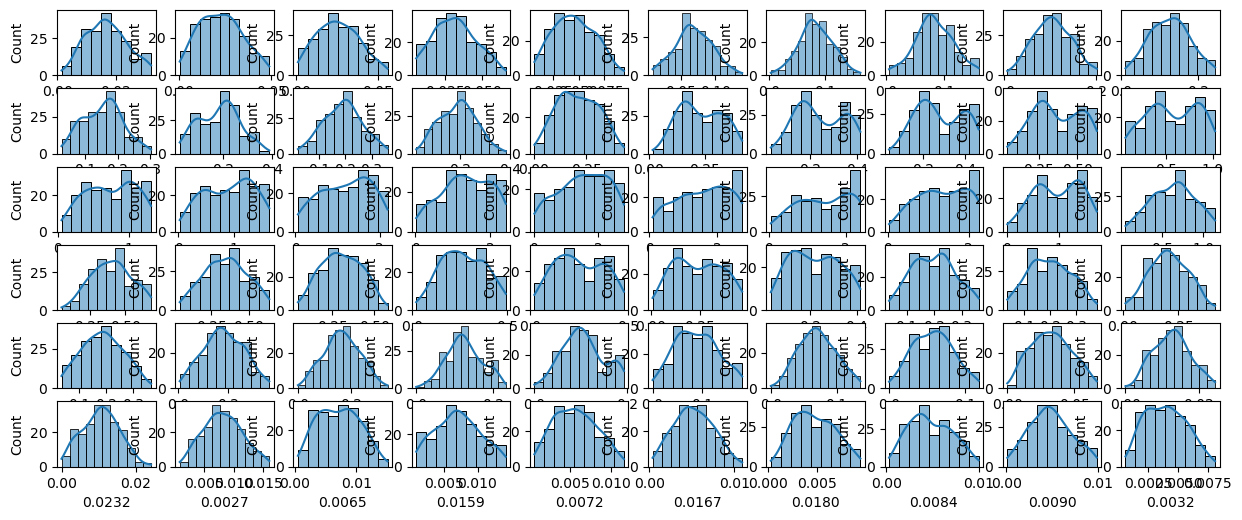

In [ ]:
plotHist()

In [ ]:
X.shape

(207, 60)

In [ ]:
threshold = VarianceThreshold(threshold=0.0)
x_new = threshold.fit_transform(X)

# To get the remaining column names
remaining_columns = X.columns[threshold.get_support(indices=True)]

df_threshold = pd.DataFrame(x_new, columns=remaining_columns)

df_threshold.shape

(207, 60)

In [ ]:
corr_matrix = df_threshold.corr().abs()

threshold_columns = set()

threshold = 0.95

for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if(corr_matrix.iloc[i,j] > threshold):
      threshold.add(corr_matrix.columns[i])

# print("ThresholdColumnsare", threshold_columns)

df_correlated = df_threshold.drop(columns=list(threshold_columns))

df_correlated.shape

(207, 60)

In [ ]:
mi_scores = mutual_info_classif(df_correlated, Y, discrete_features="auto")
mi_df = pd.DataFrame({"Features":X.columns, 'Mi Score':mi_scores})
mi_df = mi_df.sort_values(by='Mi Score', ascending=False)

print(mi_df)

   Features  Mi Score
11   0.1582  0.138747
10   0.1609  0.123605
48   0.0383  0.113925
47   0.1343  0.095987
9    0.2111  0.089440
8    0.3109  0.082754
7    0.1601  0.074143
36   0.6692  0.069879
45   0.1386  0.061444
20   0.5783  0.055752
38   0.4943  0.053851
19   0.4797  0.052831
35   0.8507  0.047716
24   0.6711  0.046754
22   0.4328  0.045944
14   0.0660  0.044392
16   0.3100  0.044245
15   0.2273  0.039123
57   0.0084  0.038159
42   0.2825  0.036840
59   0.0032  0.036429
4    0.0954  0.036015
46   0.1051  0.035715
28   0.6791  0.030947
37   0.6097  0.029700
21   0.5071  0.029419
29   0.3857  0.028507
32   0.5121  0.028319
6    0.1539  0.026245
0    0.0200  0.026231
39   0.2744  0.025872
51   0.0027  0.025180
12   0.2238  0.023944
58   0.0090  0.023681
54   0.0072  0.023353
44   0.2641  0.022735
43   0.4256  0.021834
2    0.0428  0.015074
23   0.5550  0.010507
3    0.0207  0.005272
31   0.2604  0.003187
27   0.8080  0.002531
30   0.1307  0.001763
34   0.8537  0.001133
50   0.023

In [ ]:

selector = SelectKBest(mutual_info_classif, k=50)
X_mutualInfo = selector.fit_transform(df_correlated, Y)

selected_columns = df_correlated.columns[selector.get_support()]

# Optional: convert back to DataFrame
X_mutualInfo_df = pd.DataFrame(X_mutualInfo, columns=selected_columns)

In [ ]:
model1 = LogisticRegression()

f_sfs = SequentialFeatureSelector(estimator=model1, n_features_to_select=48, direction="forward")

sfs_transformed = f_sfs.fit_transform(X_mutualInfo,Y)

selected_feature = X_mutualInfo_df.columns[f_sfs.get_support()]

# Get selected feature names
print("Selected features:", selected_feature.tolist())

f_sfs_df =  pd.DataFrame(sfs_transformed, columns=selected_feature)




KeyboardInterrupt: 